In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the sales data
sales_data = pd.read_csv('sales.csv')  # Replace with your actual file path

# Filter for Texas stores only
sales_data_tx = sales_data[sales_data['state_id'] == 'TX']

# Reshape sales data from wide to long format
sales_long_tx = pd.melt(sales_data_tx, 
                        id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                        var_name='day', value_name='sales')

# Load the calendar data
calendar = pd.read_csv('calendar.csv')  # Replace with your actual file path

# Merge the long sales data with the calendar data
sales_long_tx = sales_long_tx.merge(calendar, left_on='day', right_on='d')

# Load the sell price data
sell_prices_tx = pd.read_csv('sell_prices.csv')  # Replace with your actual file path
# Filter for Texas stores only
sell_prices_tx = sell_prices_tx[sell_prices_tx['store_id'].str.contains('TX')]

# Merge with the sell prices data
sales_long_tx = sales_long_tx.merge(sell_prices_tx, on=['store_id', 'item_id', 'wm_yr_wk'])

# Convert the date to a datetime object
sales_long_tx['date'] = pd.to_datetime(sales_long_tx['date'])

# Aggregate to monthly sales per item for Texas stores
sales_monthly_tx = sales_long_tx.groupby(['item_id', pd.Grouper(key='date', freq='M')])['sales'].sum().reset_index()

# Label encode the categorical variables
label_encoders_tx = {}
for column in ['item_id', 'dept_id', 'cat_id', 'store_id']:
    label_encoders_tx[column] = LabelEncoder()
    sales_monthly_tx[column] = label_encoders_tx[column].fit_transform(sales_monthly_tx[column])

# Your master dataset is now ready and stored in sales_monthly_tx


KeyError: 'dept_id'

In [2]:
# Check the columns in the DataFrame
print(sales_monthly_tx.columns)


Index(['item_id', 'date', 'sales'], dtype='object')


In [3]:
# Assuming 'dept_id' is not needed and does not exist in your DataFrame
for column in ['item_id', 'store_id']:  # Remove 'dept_id' from the list
    label_encoders_tx[column] = LabelEncoder()
    sales_monthly_tx[column] = label_encoders_tx[column].fit_transform(sales_monthly_tx[column])

# Continue with the rest of your code


KeyError: 'store_id'

In [7]:
import pandas as pd

# Load the datasets
sales = pd.read_csv('sales_train_validation.csv')
calendar = pd.read_csv('calendar.csv')
sell_prices = pd.read_csv('sell_prices.csv')


In [23]:
# Assuming 'sales.csv' has columns like 'item_id', 'store_id', and daily sales data
# And you want to focus on TX data, ensure your 'store_id' or similar identifies TX stores

# Convert calendar's 'date' column to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

# Merge 'sales' with 'calendar' to get the 'date' for sales data
# This assumes your sales data has columns like 'd_1', 'd_2', ..., representing sales for specific days
sales_melted = sales.melt(id_vars=['item_id', 'store_id'], var_name='d', value_name='sales')
master_df = pd.merge(sales_melted, calendar, left_on='d', right_on='d')

# Optionally, merge with 'sell_prices' if price data is needed for the analysis
# This would require 'sell_prices' to have 'item_id', 'store_id', and the price
master_df = pd.merge(master_df, sell_prices, on=['item_id', 'store_id', 'wm_yr_wk'])

# Filter for Texas (TX) if 'store_id' contains state information, e.g., TX_1, TX_2, etc.
tx_data = master_df[master_df['store_id'].str.contains('TX')]


In [24]:
tx_data

item_id store_id       d sales       date  wm_yr_wk  \
31605     HOBBIES_1_004     TX_1     d_1     1 2011-01-29     11101   
31606     HOBBIES_1_004     TX_1     d_2     2 2011-01-30     11101   
31607     HOBBIES_1_004     TX_1     d_3     1 2011-01-31     11101   
31608     HOBBIES_1_004     TX_1     d_4     0 2011-02-01     11101   
31609     HOBBIES_1_004     TX_1     d_5     2 2011-02-02     11101   
...                 ...      ...     ...   ...        ...       ...   
46009658    FOODS_3_825     TX_3  d_1913     0 2016-04-24     11613   
46009659    FOODS_3_826     TX_3  d_1912     1 2016-04-23     11613   
46009660    FOODS_3_826     TX_3  d_1913     2 2016-04-24     11613   
46009661    FOODS_3_827     TX_3  d_1912     0 2016-04-23     11613   
46009662    FOODS_3_827     TX_3  d_1913     3 2016-04-24     11613   

            weekday  wday  month  year event_name_1 event_type_1 event_name_2  \
31605      Saturday     1      1  2011          NaN          NaN          NaN   
31606        Sunday     2      1  2011          NaN          NaN          NaN   
31607        Monday     3      1  2011          NaN          NaN          NaN   
31608       Tuesday     4      2  2011          NaN          NaN          NaN   
31609     Wednesday     5      2  2011          NaN          NaN          NaN   
...             ...   ...    ...   ...          ...          ...          ...   
46009658     Sunday     2      4  2016          NaN          NaN          NaN   
46009659   Saturday     1      4  2016          NaN          NaN          NaN   
46009660     Sunday     2      4  2016          NaN          NaN          NaN   
46009661   Saturday     1      4  2016          NaN          NaN          NaN   
46009662     Sunday     2      4  2016          NaN          NaN          NaN   

         event_type_2  snap_CA  snap_TX  snap_WI  sell_price  
31605             NaN        0        0        0        4.34  
31606             NaN        0        0        0        4.34  
31607             NaN        0        0        0        4.34  
31608             NaN        1        1        0        4.34  
31609             NaN        1        0        1        4.34  
...               ...      ...      ...      ...         ...  
46009658          NaN        0        0        0        3.98  
46009659          NaN        0        0        0        1.28  
46009660          NaN        0        0        0        1.28  
46009661          NaN        0        0        0        1.00  
46009662          NaN        0        0        0        1.00  

[14086887 rows x 18 columns]

In [27]:
tx_data

item_id store_id       d sales       date  wm_yr_wk_x  \
0         HOBBIES_1_004     TX_1     d_1     1 2011-01-29       11101   
1         HOBBIES_1_008     TX_1     d_1     4 2011-01-29       11101   
2         HOBBIES_1_009     TX_1     d_1     3 2011-01-29       11101   
3         HOBBIES_1_010     TX_1     d_1     0 2011-01-29       11101   
4         HOBBIES_1_012     TX_1     d_1     0 2011-01-29       11101   
...                 ...      ...     ...   ...        ...         ...   
14086882    FOODS_3_823     TX_3  d_1913     2 2016-04-24       11613   
14086883    FOODS_3_824     TX_3  d_1913     0 2016-04-24       11613   
14086884    FOODS_3_825     TX_3  d_1913     0 2016-04-24       11613   
14086885    FOODS_3_826     TX_3  d_1913     2 2016-04-24       11613   
14086886    FOODS_3_827     TX_3  d_1913     3 2016-04-24       11613   

           weekday  wday  month  year event_name_1_x event_type_1  \
0         Saturday     1      1  2011            NaN          NaN   
1         Saturday     1      1  2011            NaN          NaN   
2         Saturday     1      1  2011            NaN          NaN   
3         Saturday     1      1  2011            NaN          NaN   
4         Saturday     1      1  2011            NaN          NaN   
...            ...   ...    ...   ...            ...          ...   
14086882    Sunday     2      4  2016            NaN          NaN   
14086883    Sunday     2      4  2016            NaN          NaN   
14086884    Sunday     2      4  2016            NaN          NaN   
14086885    Sunday     2      4  2016            NaN          NaN   
14086886    Sunday     2      4  2016            NaN          NaN   

         event_name_2 event_type_2  snap_TX_x  sell_price  wm_yr_wk_y  \
0                 NaN          NaN          0        4.34       11101   
1                 NaN          NaN          0        0.46       11101   
2                 NaN          NaN          0        1.56       11101   
3                 NaN          NaN          0        3.17       11101   
4                 NaN          NaN          0        5.98       11101   
...               ...          ...        ...         ...         ...   
14086882          NaN          NaN          0        2.98       11613   
14086883          NaN          NaN          0        2.48       11613   
14086884          NaN          NaN          0        3.98       11613   
14086885          NaN          NaN          0        1.28       11613   
14086886          NaN          NaN          0        1.00       11613   

         event_name_1_y  snap_TX_y  
0                   NaN          0  
1                   NaN          0  
2                   NaN          0  
3                   NaN          0  
4                   NaN          0  
...                 ...        ...  
14086882            NaN          0  
14086883            NaN          0  
14086884            NaN          0  
14086885            NaN          0  
14086886            NaN          0  

[14086887 rows x 19 columns]

In [28]:
import pandas as pd
import numpy as np

# Assuming tx_data is your DataFrame
# Step 1: Aggregate Weekly Sales
weekly_sales = tx_data.groupby(['item_id', 'wm_yr_wk_x'], as_index=False)['sales'].sum()

# Step 2: Determine SNAP_TX for the week
# If any day in the week had SNAP_TX, mark the week as having SNAP_TX
snap_tx_weekly = tx_data.groupby(['item_id', 'wm_yr_wk_x'], as_index=False)['snap_TX_x'].max()

# Since we're focusing on Texas data, we'll ignore SNAP_CA and SNAP_WI in this context

# Step 3: Handle Events
# For simplicity, let's keep the first event of the week if multiple events are present
events_weekly = tx_data.dropna(subset=['event_name_1_x']).groupby(['item_id', 'wm_yr_wk_x'], as_index=False)['event_name_1_x'].first()

# Combining the Aggregated Data
# Merge weekly sales with SNAP_TX data
weekly_data = pd.merge(weekly_sales, snap_tx_weekly, on=['item_id', 'wm_yr_wk_x'])

# Merge with event data
weekly_data = pd.merge(weekly_data, events_weekly, on=['item_id', 'wm_yr_wk_x'], how='left')

# The resulting DataFrame 'weekly_data' now contains:
# 'item_id', 'wm_yr_wk_x' (week of the year), 'sales' (summed weekly), 
# 'snap_TX_x' (indicating SNAP presence in the week), and 
# 'event_name_1_x' (first event of the week if present, NaN otherwise).

# Display the first few rows to verify
print(weekly_data.head())


       item_id  wm_yr_wk_x  sales  snap_TX_x event_name_1_x
0  FOODS_1_001       11101      9          1            NaN
1  FOODS_1_001       11102     16          1      SuperBowl
2  FOODS_1_001       11103     16          1  ValentinesDay
3  FOODS_1_001       11104     13          0  PresidentsDay
4  FOODS_1_001       11105     14          1            NaN


In [29]:
# Assuming tx_data is your DataFrame
# Aggregate Weekly Sales and Calculate Average Sell Price
weekly_aggregates = tx_data.groupby(['item_id', 'wm_yr_wk_x'], as_index=False).agg({
    'sales': 'sum',  # Sum weekly sales
    'sell_price': 'mean'  # Average sell price for the week
})

# Determine SNAP_TX for the week
# If any day in the week had SNAP_TX, mark the week as having SNAP_TX
snap_tx_weekly = tx_data.groupby(['item_id', 'wm_yr_wk_x'], as_index=False)['snap_TX_x'].max()

# Handle Events - Keeping the first event of the week if multiple events are present
events_weekly = tx_data.dropna(subset=['event_name_1_x']).groupby(['item_id', 'wm_yr_wk_x'], as_index=False)['event_name_1_x'].first()

# Combining the Aggregated Data
# Merge weekly sales and average sell price with SNAP_TX data
weekly_data = pd.merge(weekly_aggregates, snap_tx_weekly, on=['item_id', 'wm_yr_wk_x'])

# Merge with event data
weekly_data = pd.merge(weekly_data, events_weekly, on=['item_id', 'wm_yr_wk_x'], how='left')

# The resulting DataFrame 'weekly_data' now contains:
# 'item_id', 'wm_yr_wk_x' (week of the year), 'sales' (summed weekly),
# 'sell_price' (average weekly price), 'snap_TX_x' (indicating SNAP presence in the week),
# and 'event_name_1_x' (first event of the week if present, NaN otherwise).

# Display the first few rows to verify
print(weekly_data.head())


       item_id  wm_yr_wk_x sales  sell_price  snap_TX_x event_name_1_x
0  FOODS_1_001       11101     9         2.0          1            NaN
1  FOODS_1_001       11102    16         2.0          1      SuperBowl
2  FOODS_1_001       11103    16         2.0          1  ValentinesDay
3  FOODS_1_001       11104    13         2.0          0  PresidentsDay
4  FOODS_1_001       11105    14         2.0          1            NaN


In [30]:
import pandas as pd

# Assuming tx_data is your DataFrame

# Group by 'item_id' and 'wm_yr_wk_x' for weekly sales sum
weekly_sales = tx_data.groupby(['item_id', 'wm_yr_wk_x'], as_index=False)['sales'].sum()

# Determine SNAP_TX for the week
snap_tx_weekly = tx_data.groupby(['item_id', 'wm_yr_wk_x'], as_index=False)['snap_TX_x'].max()

# Calculate the average sell price per item per week
avg_price_weekly = tx_data.groupby(['item_id', 'wm_yr_wk_x'], as_index=False)['sell_price'].mean()

# Handle Events - keeping the first event of the week if multiple events are present
events_weekly = tx_data.dropna(subset=['event_name_1_x']).groupby(['item_id', 'wm_yr_wk_x'], as_index=False)['event_name_1_x'].first()

# Combining all the aggregated data
weekly_data = pd.merge(weekly_sales, snap_tx_weekly, on=['item_id', 'wm_yr_wk_x'])
weekly_data = pd.merge(weekly_data, avg_price_weekly, on=['item_id', 'wm_yr_wk_x'], how='left')
weekly_data = pd.merge(weekly_data, events_weekly, on=['item_id', 'wm_yr_wk_x'], how='left')

# Renaming columns for clarity
weekly_data.rename(columns={'sales': 'total_sales', 'snap_TX_x': 'snap_TX', 
                            'sell_price': 'avg_weekly_price', 'event_name_1_x': 'event_name'}, inplace=True)

# Display the first few rows to verify
print(weekly_data.head())


       item_id  wm_yr_wk_x  total_sales  snap_TX  avg_weekly_price  \
0  FOODS_1_001       11101            9        1               2.0   
1  FOODS_1_001       11102           16        1               2.0   
2  FOODS_1_001       11103           16        1               2.0   
3  FOODS_1_001       11104           13        0               2.0   
4  FOODS_1_001       11105           14        1               2.0   

      event_name  
0            NaN  
1      SuperBowl  
2  ValentinesDay  
3  PresidentsDay  
4            NaN  


In [31]:
# Assuming 'weekly_data' is your DataFrame

# Define a function to extract the category number from the 'item_id' string
def extract_category_number(item_id):
    parts = item_id.split('_')
    if len(parts) > 1:
        # Return the category number, which is expected to be the second part of the 'item_id' string
        return parts[1]
    else:
        # Return a default value or NaN if the expected part is not found
        return np.nan

# Apply the function to the 'item_id' column to create a new 'category_number' column
weekly_data['category_number'] = weekly_data['item_id'].apply(extract_category_number)

# Display the updated DataFrame
print(weekly_data.head())


       item_id  wm_yr_wk_x  total_sales  snap_TX  avg_weekly_price  \
0  FOODS_1_001       11101            9        1               2.0   
1  FOODS_1_001       11102           16        1               2.0   
2  FOODS_1_001       11103           16        1               2.0   
3  FOODS_1_001       11104           13        0               2.0   
4  FOODS_1_001       11105           14        1               2.0   

      event_name category_number  
0            NaN               1  
1      SuperBowl               1  
2  ValentinesDay               1  
3  PresidentsDay               1  
4            NaN               1  


In [32]:
# Assuming 'weekly_data' is your DataFrame

# Define a function to extract the category and subcategory from the 'item_id' string
def extract_categories(item_id):
    parts = item_id.split('_')
    # Return the general category and subcategory number
    # Adjust the indices if the structure is different
    return parts[0], parts[1]

# Apply the function to the 'item_id' column to create new columns for category and subcategory
weekly_data[['general_category', 'category_number']] = weekly_data['item_id'].apply(
    lambda x: pd.Series(extract_categories(x))
)

# Display the updated DataFrame
print(weekly_data.head())


       item_id  wm_yr_wk_x  total_sales  snap_TX  avg_weekly_price  \
0  FOODS_1_001       11101            9        1               2.0   
1  FOODS_1_001       11102           16        1               2.0   
2  FOODS_1_001       11103           16        1               2.0   
3  FOODS_1_001       11104           13        0               2.0   
4  FOODS_1_001       11105           14        1               2.0   

      event_name category_number general_category  
0            NaN               1            FOODS  
1      SuperBowl               1            FOODS  
2  ValentinesDay               1            FOODS  
3  PresidentsDay               1            FOODS  
4            NaN               1            FOODS  


In [33]:
weekly_data

item_id  wm_yr_wk_x  total_sales  snap_TX  avg_weekly_price  \
0           FOODS_1_001       11101            9        1              2.00   
1           FOODS_1_001       11102           16        1              2.00   
2           FOODS_1_001       11103           16        1              2.00   
3           FOODS_1_001       11104           13        0              2.00   
4           FOODS_1_001       11105           14        1              2.00   
...                 ...         ...          ...      ...               ...   
682749  HOUSEHOLD_2_516       11609            5        1              5.94   
682750  HOUSEHOLD_2_516       11610            3        1              5.94   
682751  HOUSEHOLD_2_516       11611            4        1              5.94   
682752  HOUSEHOLD_2_516       11612            3        0              5.94   
682753  HOUSEHOLD_2_516       11613            0        0              5.94   

           event_name category_number general_category  
0                 NaN               1            FOODS  
1           SuperBowl               1            FOODS  
2       ValentinesDay               1            FOODS  
3       PresidentsDay               1            FOODS  
4                 NaN               1            FOODS  
...               ...             ...              ...  
682749         Easter               2        HOUSEHOLD  
682750            NaN               2        HOUSEHOLD  
682751            NaN               2        HOUSEHOLD  
682752            NaN               2        HOUSEHOLD  
682753            NaN               2        HOUSEHOLD  

[682754 rows x 8 columns]

In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'weekly_data' is your DataFrame and it's already been updated with the 'general_category' and 'category_number' columns

# Select features for clustering (dropping non-numeric and non-relevant columns)
features_for_clustering = weekly_data.drop(columns=['item_id', 'wm_yr_wk_x', 'event_name'])

# Column transformer with one-hot encoding for categorical features and scaling for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['total_sales', 'avg_weekly_price']),
        ('cat', OneHotEncoder(), ['category_number', 'general_category', 'snap_TX'])
    ])

# Fit the preprocessor to your data
preprocessor.fit(features_for_clustering)

# Transform the data
data_preprocessed = preprocessor.transform(features_for_clustering)


ValueError: x and y must have same first dimension, but have shapes (10,) and (19,)

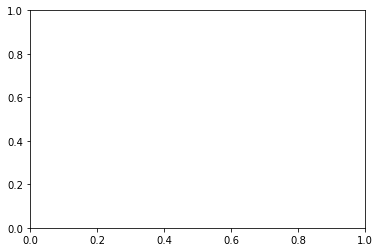

In [36]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 20):  # Check for up to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_preprocessed)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph


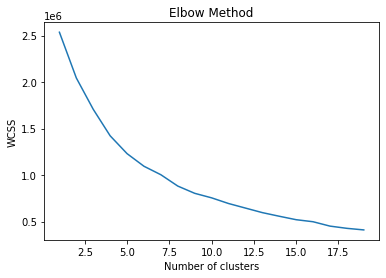

In [37]:
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()


In [38]:
# Choose the optimal number of clusters based on the elbow graph and fit the final K-means model
optimal_clusters = 10  # Replace with the number of clusters you determined from the elbow graph
final_kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
final_kmeans.fit(data_preprocessed)

# Append the cluster labels to your original DataFrame
weekly_data['cluster_label'] = final_kmeans.labels_


In [40]:
# Assuming 'final_kmeans' is your fitted KMeans model
centroids = final_kmeans.cluster_centers_

# Identify which transformers and which columns were numerical
num_features = preprocessor.named_transformers_['num'].get_feature_names_out()

# Inverse transform the numerical features of the centroids
scaler = preprocessor.named_transformers_['num']
centroids_numerical = scaler.inverse_transform(centroids[:, :len(num_features)])

# For one-hot encoded features, identify the maximum value index for each categorical feature
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out()
centroids_categorical_indices = centroids[:, len(num_features):].argmax(axis=1)


In [41]:
# Assuming you have the one-hot encoder object
onehot_encoder = preprocessor.named_transformers_['cat']
categories = onehot_encoder.categories_

# Function to get the category from the one-hot encoded vector
def get_category_from_index(cat_index, categories):
    for cat, indices in zip(categories, cat_index):
        yield cat[indices]

# Reconstruct the categorical features
centroids_categorical = np.array(list(get_category_from_index(centroids_categorical_indices, categories)))


IndexError: index 6 is out of bounds for axis 0 with size 3

In [42]:
# Assuming 'final_kmeans' is your fitted KMeans model
centroids = final_kmeans.cluster_centers_

# Identify which transformers and which columns were numerical
num_features = preprocessor.named_transformers_['num'].get_feature_names_out()

# Inverse transform the numerical features of the centroids
scaler = preprocessor.named_transformers_['num']
centroids_numerical = scaler.inverse_transform(centroids[:, :len(num_features)])

# For one-hot encoded features, we need to identify the original category for each one-hot encoded feature
onehot_encoder = preprocessor.named_transformers_['cat']
centroids_categorical = centroids[:, len(num_features):]

# We need to split the centroids_categorical back into the original columns
# Assuming the one-hot encoded columns are at the end of the preprocessed data
start_idx = 0
decoded_categories = []
for category in onehot_encoder.categories_:
    end_idx = start_idx + len(category)
    # Get the index of the max value in each one-hot encoded array slice, which corresponds to the original category
    category_indices = centroids_categorical[:, start_idx:end_idx].argmax(axis=1)
    # Map the indices back to the original category labels
    decoded_categories.append(np.array(category)[category_indices])
    start_idx = end_idx

# Now decoded_categories contains the original category labels for each one-hot encoded column
# Combine numerical and categorical centroid features
centroids_complete = np.hstack((centroids_numerical, np.column_stack(decoded_categories)))

# Create a DataFrame for easier analysis
column_names = num_features.tolist() + [f'category_{i}' for i in range(len(decoded_categories))]
centroids_df = pd.DataFrame(centroids_complete, columns=column_names)

# Display the centroids DataFrame
print(centroids_df)


   total_sales avg_weekly_price category_0 category_1 category_2
0      10.8452         4.287869          2  HOUSEHOLD          0
1     6.851882         5.325125          2  HOUSEHOLD          1
2    28.545787         2.797187          3      FOODS          1
3     18.06947         3.421752          1    HOBBIES          1
4  1349.189636         1.494432          3      FOODS          1
5    25.940278         2.864306          3      FOODS          0
6    10.686359        12.418118          1    HOBBIES          1
7   290.789632         1.757151          3      FOODS          1
8    28.149154         3.975978          1  HOUSEHOLD          1
9    18.186993         3.251227          2      FOODS          1


In [44]:
import pandas as pd

# Assuming the data is provided in a dictionary format
data = {
    'total_sales': [10.84, 6.85, 28.54, 18.06, 1349.18, 25.94, 10.68, 290.78, 28.14, 18.18],
    'avg_weekly_price': [4.28, 5.32, 2.79, 3.42, 1.49, 2.86, 12.41, 1.75, 3.97, 3.25],
    'category_0': [2, 2, 3, 1, 3, 3, 1, 3, 1, 2],
    'category_1': ['HOUSEHOLD', 'HOUSEHOLD', 'FOODS', 'HOBBIES', 'FOODS', 'FOODS', 'HOBBIES', 'FOODS', 'HOUSEHOLD', 'FOODS'],
    'category_2': [0, 1, 1, 1, 1, 0, 1, 1, 1, 1]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Rename columns as specified
df.rename(columns={'category_0': 'Food_Household_Category', 'category_1': 'General_Category', 'category_2': 'SNAP_TX'}, inplace=True)

# Map numerical category to 'FOOD' or 'HOUSEHOLD'
df['Food_Household_Category'] = df['Food_Household_Category'].map({1: 'HOBBIES', 2: 'HOUSEHOLD', 3: 'FOODS'})

# Map SNAP_TX from numerical to actual boolean values
df['SNAP_TX'] = df['SNAP_TX'].map({0: 'No', 1: 'Yes'})

# Apply styling to make the table "pretty"
styled_df = df.style.set_table_styles(
    [{'selector': 'th',
      'props': [('background-color', '#f4f4f4'), 
                ('font-weight', 'bold'), 
                ('border', '1px solid black'),
                ('text-align', 'center')]},
     {'selector': 'td',
      'props': [('border', '1px solid grey'),
                ('text-align', 'center')]},
     {'selector': 'tr:nth-of-type(odd)',
      'props': [('background-color', '#eee')]},
     {'selector': 'tr:nth-of-type(even)',
      'props': [('background-color', '#fff')]}]
).set_properties(**{'width': '150px'})

# Show the styled DataFrame
styled_df


In [45]:
# Apply styling and set decimal precision for numeric columns
styled_df = df.style.format({
    'total_sales': "{:.2f}",
    'avg_weekly_price': "{:.2f}"
}).set_table_styles(
    [{'selector': 'th',
      'props': [('background-color', '#f4f4f4'), 
                ('font-weight', 'bold'), 
                ('border', '1px solid black'),
                ('text-align', 'center')]},
     {'selector': 'td',
      'props': [('border', '1px solid grey'),
                ('text-align', 'center')]},
     {'selector': 'tr:nth-of-type(odd)',
      'props': [('background-color', '#eee')]},
     {'selector': 'tr:nth-of-type(even)',
      'props': [('background-color', '#fff')]}]
).set_properties(**{'width': '150px'})

# Show the styled DataFrame
styled_df


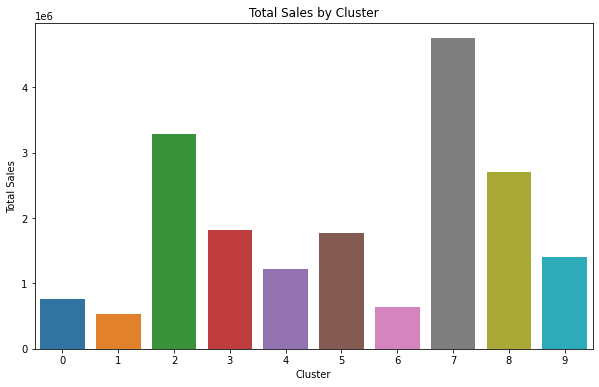

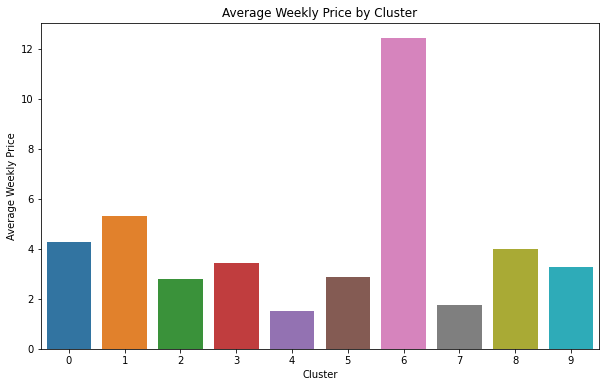

In [53]:
import seaborn as sns

# Bar graph for total sales by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster_label', y='total_sales', data=weekly_data, estimator=sum, ci=None)
plt.title('Total Sales by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Sales')
plt.show()

# Bar graph for average weekly prices by cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='cluster_label', y='avg_weekly_price', data=weekly_data, estimator=np.mean, ci=None)
plt.title('Average Weekly Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Weekly Price')
plt.show()


In [25]:
# Assuming 'date' and 'wm_yr_wk' (week of the year) are already in the calendar data
# Ensure the 'date' column is in datetime format for both sales and calendar dataframes
tx_data['date'] = pd.to_datetime(tx_data['date'])
calendar['date'] = pd.to_datetime(calendar['date'])

# Merge the sales data with the calendar to get weekly and event information
tx_data = pd.merge(tx_data, calendar[['date', 'wm_yr_wk', 'event_name_1', 'snap_TX']], on='date')

# Drop SNAP_CA and SNAP_WI, assuming they are in tx_data if merged previously from calendar
tx_data = tx_data.drop(columns=['snap_CA', 'snap_WI'])


C:\Users\devar\AppData\Local\Temp/ipykernel_27376/2096766934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_data['date'] = pd.to_datetime(tx_data['date'])


In [26]:
# Group by 'item_id' and 'wm_yr_wk' to aggregate sales by week
weekly_sales = tx_data.groupby(['item_id', 'wm_yr_wk'], as_index=False)['sales'].sum()

# Aggregate SNAP_TX at the week level to reflect if there was a SNAP day
snap_tx_weekly = tx_data.groupby(['item_id', 'wm_yr_wk'], as_index=False)['snap_TX'].max()


KeyError: 'wm_yr_wk'